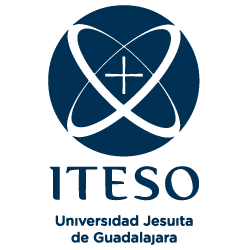


## Proyecto 1 ##
### Simulación Matemática ###
Gallegos Velica Aranxa  
Ramírez Ochoa Santiago  
Ruvalcaba Barboza Gabriel  
  
Profesor:    
Desirena López Gaddiel  



# Predicción de comportamiento mediante ajuste de curvas con aplicación financiera #


## Objetivo general ##  
  
Utilizar el ajuste de curvas para generar un modelo predictivo.  
  
### Objetivos ###

#### 1.  #### 
A partir de datos recabados de la bolsa de valores de Wall Street establecer un método de ajuste de curvas que permita predecir el comportamiento de las acciones.  
#### 2. ####  
Predecir el cierre y apertura de la bolsa con base en la curva obtenida.    
#### 3. ####  
Tras analizar los datos obtenidos y el comportamiento predicho, proponer una estrategia de inversión que proteja los intereses de los inversores.  



  
      
            
## Planteamiento del problema ##  
  
    
      
El fondo de inversión WhiteStone Capital Management maneja inversiones privadas y mueve capitales en las industrias mas importantes del índice Standard & Poors 500, entre las cuales se encuentran la Industria Alimenticia, la Petrolera, los Bienes raíces entre otras.  
El momento mundial actual es uno de alta volatílidad debido a las situaciones geopolíticas que se han presentado en los últimos años. En primer lugar la pandemia de Covid-19 afectó la cadena de suministros global, impactando las bolsas de valores de todo el mundo, llegando inclusive a los cierres temporales de Wall Street en 2020. Recientemente se ha estabilizado el mercado financiero, sin embargo con la operación militar especial de Rusia en Ucrania se han disparado los precios de fertilizantes y energéticos, afectando principalmente a las industrias alimenticia y energética.  
La junta directiva de la empresa, preocupada por la incertidumbre de los mercados decide plantear una estrategia para manejar con la mayor prudencia posible sus capitales y evitar así las pérdidas.  
Se decide comisionar a un equipo de ingenieros para establecer un modelo predictivo que utilice los datos mas recientes de comportamiento de cierre y apertura del índice S&P500 
  
### Datos Recabados ###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize as opt

In [2]:
# Carga de datos
ruta = 'C:/Users/galle/OneDrive - ITESO/2022A/simulación matemática/'
data = pd.read_excel(ruta + 'Datos Proyecto SimMat.xlsx')
data.head()

,Fecha,Cierre,Apertura,Máximo,Mínimo,Vol.,% var.,Columna1,Columna2
0,2022-05-16,4008.01,4013.02,4046.46,3983.99,-,-0.0039,1,Lunes
1,2022-05-17,4088.85,4052.00,4090.72,4033.93,-,0.0202,2,Martes
2,2022-05-18,3923.68,4051.98,4051.98,3911.91,-,-0.0404,3,Miércoles
3,2022-05-19,3900.79,3899.00,3945.96,3876.58,-,-0.0058,4,Jueves
4,2022-05-20,3901.36,3927.76,3943.42,3810.32,-,0.0001,5,Viernes


In [6]:
# Formatear columna 'Fecha' a tipo datetime
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d/%m/%Y')

# Eliminar columna 'Vol.'
data.drop(columns={'Vol.'}, inplace = True)

# Renombrar columnas 'Columna1' y 'Columna2'
data.rename(columns={'Columna1':'x', 'Columna2':'Día'}, inplace=True)
data.head()

,Fecha,Cierre,Apertura,Máximo,Mínimo,% var.,x,Día
0,2022-05-16,4008.01,4013.02,4046.46,3983.99,-0.0039,1,Lunes
1,2022-05-17,4088.85,4052.00,4090.72,4033.93,0.0202,2,Martes
2,2022-05-18,3923.68,4051.98,4051.98,3911.91,-0.0404,3,Miércoles
3,2022-05-19,3900.79,3899.00,3945.96,3876.58,-0.0058,4,Jueves
4,2022-05-20,3901.36,3927.76,3943.42,3810.32,0.0001,5,Viernes


In [7]:
# Definir función de mínimos cuadrados

def min_sq(beta,x_points, y_points, n):
    x=len(x_points)
    f_hat = np.array([beta[i]*x_points**i for i in range(n+1)]).sum(axis=0)
    return (1/(2*x))*((y_points - f_hat)**2).sum()

In [22]:
# Obtener soluciones para expresiones de grado 1 a 7 (se guardan en diccionarios)

sol_cierre, sol_apert = {}, {}
errorc, errora = [], []
for i in range(1,7):
    sol_cierre[i] = opt.minimize(fun = min_sq, x0=np.zeros(i+1), args=(data['x'] , data['Cierre'] , i))
    errorc.append(sol_cierre[i].fun)
    sol_apert[i] = opt.minimize(fun = min_sq, x0=np.zeros(i+1), args=(data['x'] , data['Apertura'] , i))
    errora.append(sol_apert[i].fun)

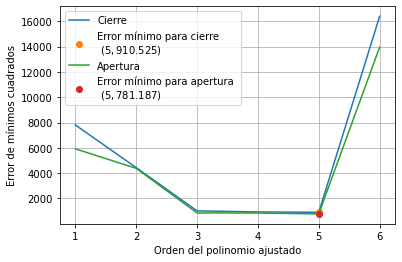

In [42]:
# Obtener cual de los grados calculados es el que muestra menor error 

minc = (errorc.index(min(errorc))+1, min(errorc))
mina = (errora.index(min(errora))+1, min(errora))

plt.plot(range(1,7), errorc, label='Cierre')
plt.plot(minc[0] ,minc[1], 'o',
         label=f'Error mínimo para cierre \n $({minc[0]}, {round(minc[1], 3)})$')
plt.plot(range(1,7),errora, label='Apertura')
plt.plot(mina[0], mina[1], 'o',
         label=f'Error mínimo para apertura \n $({mina[0]}, {round(mina[1], 3)})$')
plt.xlabel('Orden del polinomio ajustado')
plt.ylabel('Error de mínimos cuadrados')
plt.legend(loc='best')
plt.grid()

In [39]:
# Obtener f_hat de ambos conjuntos de datos (y etiquetas)

fhatc, fhata = 0, 0
labelc, labela = 'y =', 'y ='
for i in range(6):
    fhatc += sol_cierre[5].x[i] * data['x']**i
    labelc += f' {round(sol_cierre[5].x[i], 2)}x^{i} +'
    fhata += sol_apert[5].x[i] * data['x']**i
    labela += f' {round(sol_apert[5].x[i], 2)}x^{i} +'

labelc = labelc[:-2].replace('+ -', '- ').replace('x^0', '').replace('x^1', 'x')
labela = labela[:-2].replace('+ -', '- ').replace('x^0', '').replace('x^1', 'x')

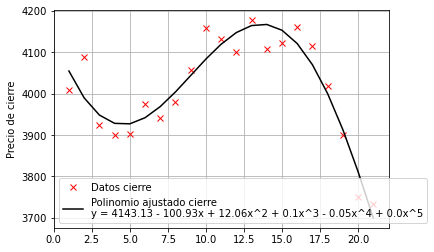

In [43]:
# Gráfica del polinomio ajustado de cierre

plt.plot(data['x'], data['Cierre'],'xr', label='Datos cierre')
plt.plot(data['x'], fhatc,'k', label='Polinomio ajustado cierre \n' + labelc)
plt.ylabel('Precio de cierre')
plt.legend(loc='best')
plt.grid()

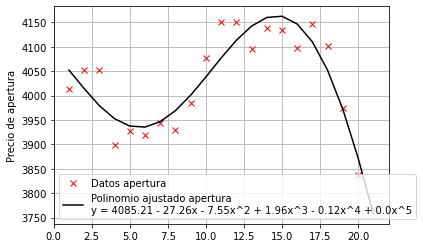

In [44]:
# Gráfica del polinomio ajustado de apertura

plt.plot(data['x'], data['Apertura'],'xr', label='Datos apertura')
plt.plot(data['x'], fhata,'k', label='Polinomio ajustado apertura \n'+labela)
plt.ylabel('Precio de apertura')
plt.legend(loc='best')
plt.grid()

In [45]:
# Función para predicción de cierre
def polinomio_cierre(x):
    pred = 0
    for i in range(6):
        pred += sol_cierre[5].x[i] * x**i
    return pred

In [46]:
# Función para predicción de apertura
def polinomio_apert(x):
    pred = 0
    for i in range(6):
        pred += sol_apert[5].x[i] * x**i
    return pred